<a href="https://colab.research.google.com/github/retrowaveist/SoC_Computational_Physics/blob/main/QMCPROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quantum Monte Carlo (QMC) Project

##Introduction


Quantum Monte Carlo (QMC) encompasses a wide range of computational techniques aimed at studying complex quantum systems. These methods are designed to accurately approximate the quantum many-body problem, which refers to a vast array of physical phenomena involving microscopic systems composed of many interacting particles. To tackle the challenges posed by the multi-dimensional integrals inherent in different formulations of the many-body problem, quantum Monte Carlo methods employ the **Monte Carlo** approach- Monte Carlo simulations implying a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results, enabling researchers to effectively address the complexities of quantum systems and gain valuable insights into their behavior. These methods offer a versatile approach to simulate quantum systems and calculate their ground state properties with high accuracy.








Now that we've got all that tech-y, science-y sounding stuff out of the way, lets get into the essence of what QMC really is.
Start off by imagining you're conducting experiments in a lab, and you want to understand how atoms and molecules behave in different situations. Quantum mechanics provides the rules for how these particles move and interact with each other, but the equations and calculations involved can quickly become overwhelming.

Here's where Quantum Monte Carlo steps in as your trusty lab assistant. Instead of trying to solve all the complex equations directly, QMC uses random sampling and statistical techniques to explore different possibilities and find approximate solutions. It's like having a virtual lab assistant who can perform countless experiments in a fraction of the time it would take to do them all manually.

The QMC starts off by making random guesses about how the particles might behave in a given system. Think of these guesses as potential scenarios or "what if" situations. Each time you make a guess, the assistant uses clever mathematical tricks to evaluate the likelihood of that scenario being correct.

It then keeps track of the most promising guesses and explores them further, discarding less likely ones along the way. This process continues, and with each iteration, the assistant refines the results and gets closer to the actual behavior of the particles.



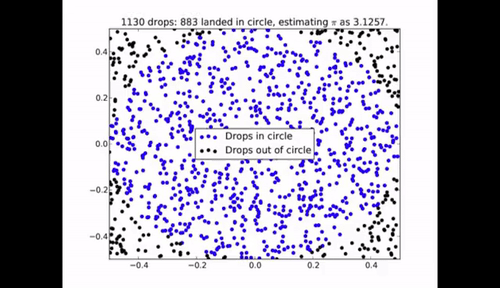

Estimating Pi Using Monte Carlo Simulation  https://thumbs.gfycat.com/PeriodicTangibleBushbaby-size_restricted.gif


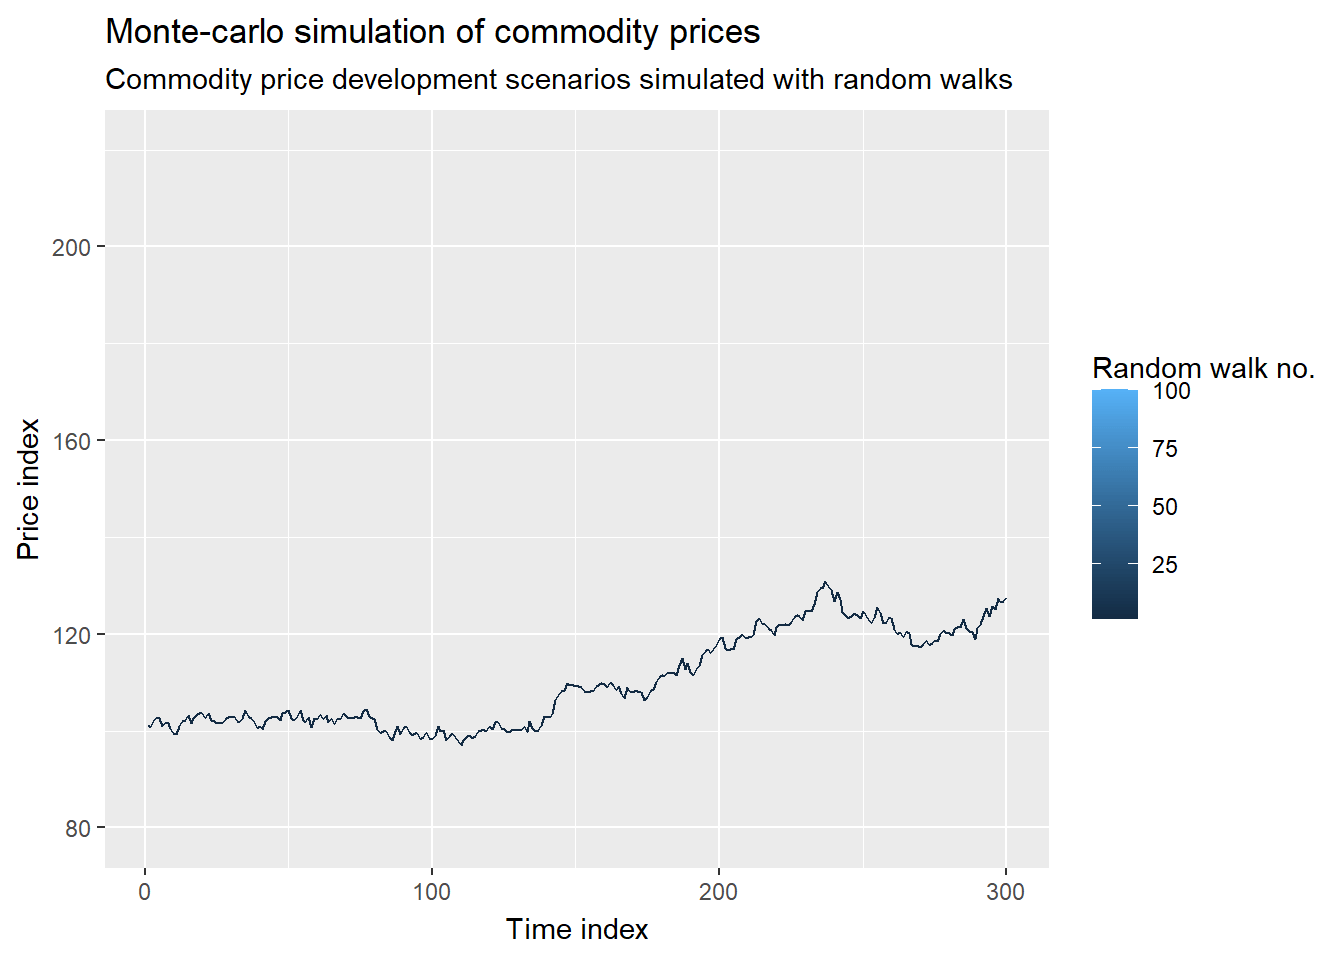
Monte Carlo Simulation of Commodity Prices using Random Walk https://www.supplychaindataanalytics.com/animated-monte-carlo-simulation-with-gganimate-in-r/

 In this project, we delve into the world of QMC by implementing both Variational Monte Carlo (VMC) and Diffusion Monte Carlo (DMC) algorithms. The primary objective is to accurately calculate ground state properties of a one-dimensional quantum well system, providing insights into the behavior and interactions of particles in this confined potential. Through a step-by-step implementation, we explore the principles of QMC, the significance of variational parameter optimization, and the importance of statistical sampling using the Metropolis-Hastings algorithm. Furthermore, we extend our analysis to DMC, which enables us to investigate the time-dependent behavior of the quantum system.

# Choosing a System of interest- A One-Dimensional Potential Well

There exists, in quantum mechanics, a theoretical concept known as the "particle in a box" model, also called the infinite potential well or infinite square well. Imagine a tiny particle, like an electron, confined within a very small space, surrounded by impenetrable barriers. This model serves as a hypothetical example to help us understand the striking differences between classical and quantum systems.

In classical systems, a particle trapped inside a large box can move freely at any speed within the box, and its position is equally likely to be found anywhere inside. However, as we delve into the realm of quantum mechanics, intriguing phenomena emerge when the box becomes incredibly narrow, on the scale of just a few nanometers.

In this quantum scenario, the particle's behavior changes drastically. It can only occupy specific positive energy levels, and it is never at a complete standstill, meaning it can never have zero energy. These energy levels act like stair steps, and the particle can only move between these discrete energy states.

Moreover, the particle's probability of being found at different positions becomes highly influenced by its energy level. Certain positions become more probable, while others become unlikely, creating regions known as spatial nodes where the particle may never be detected.

The beauty of the "particle in a box" model lies in its uniqueness as one of the very few problems in quantum mechanics that can be solved analytically, without relying on approximations. This simple yet profound model helps us grasp the fundamental distinctions between classical and quantum behavior, giving us a glimpse into the mysterious and intricate world of quantum physics.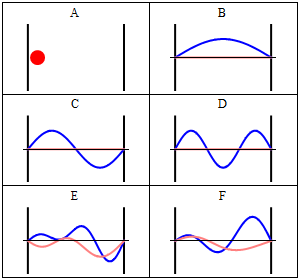
Infinite Square Well https://en.wikipedia.org/wiki/Particle_in_a_box#/media/File:InfiniteSquareWellAnimation.gif

# Implementing Variational Monte Carlo (VMC)

Variational Monte Carlo (VMC) is the first step in the QMC approach. It involves evaluating an approximation to the ground state wave function, known as the trial wave function, and performing random walks in the configuration space of the system. The trial wave function is a crucial element in VMC simulations as it determines the accuracy of the results. By optimizing the variational parameters of the trial wave function, we can systematically improve the energy estimate and approach the true ground state energy of the system.
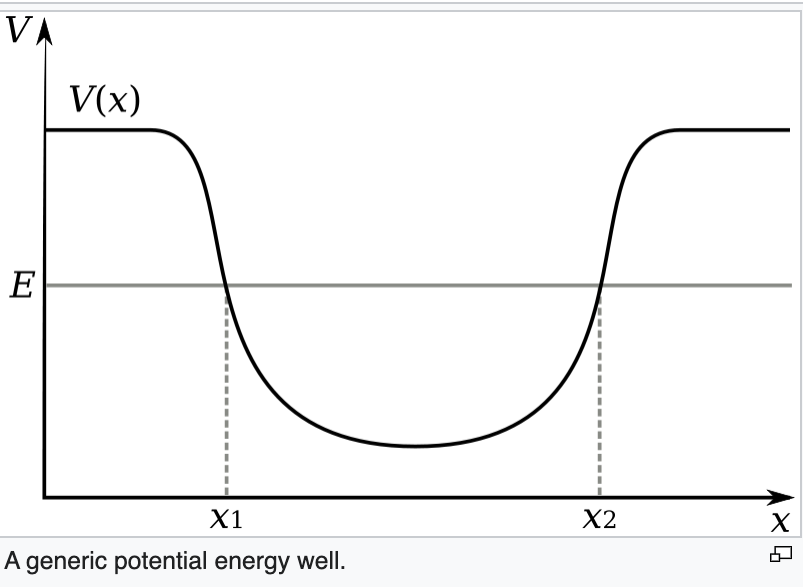
one dimensional potential well- wikipedia https://en.wikipedia.org/wiki/Potential_well#/media/File:Potential_energy_well.svg
In our one-dimensional quantum well system, we consider a particle confined to a one-dimensional potential well. This simple yet instructive model allows us to understand the behavior of quantum particles in a confined environment. The trial wave function for the one-dimensional quantum well is typically chosen to be a Gaussian function centered at the well minimum, as it provides a reasonable approximation to the ground state.

The trial wave function for our one-dimensional potential well can be expressed as follows:

Ψ(x, α) = exp[-α(x - x_min)^2]

Where:

Ψ(x, α) is the trial wave function at position x, with variational parameter α.
α is the variational parameter that we will optimize to obtain the best approximation to the ground state.
x_min is the position of the minimum of the potential well.

Let's start by defining the trial wave function for the one-dimensional quantum well and setting up the VMC simulation. We will perform random walks using the Metropolis-Hastings algorithm and optimize the variational parameters to minimize the energy estimate.



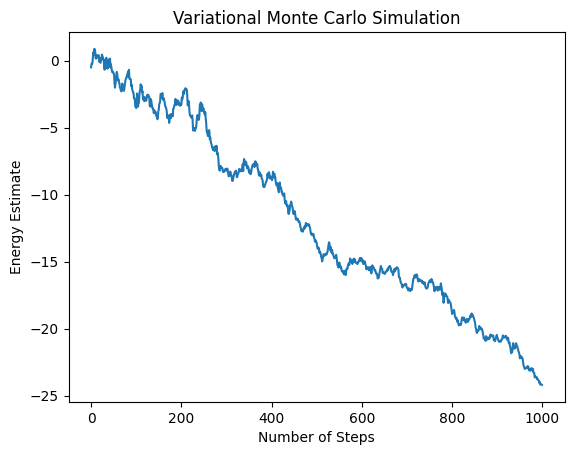

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# defining the trial wave function for the one-dimensional quantum well
def trial_wave_function(x, alpha, x0):
    return np.exp(-alpha * (x - x0)**2)

#defining the local energy of the system for a given configuration
def local_energy(x, alpha, x0):
    return (alpha**2 * (x - x0)**2 - 0.5 * alpha) * trial_wave_function(x, alpha, x0) / trial_wave_function(x, alpha, x0)

#variational Monte Carlo (VMC) simulation
def vmc_simulation(alpha_initial, x0_initial, num_steps, step_size, num_walkers):
    #initializing arrays to store results
    energies = []
    alpha_values = []
    x0_values = []

    #setting initial values for alpha and x0
    alpha = alpha_initial
    x0 = x0_initial

    #performing random walks using Metropolis-Hastings algorithm
    for step in range(num_steps):
        #performing a random walk for each walker
        for walker in range(num_walkers):
            #generate a random displacement
            delta_alpha = np.random.uniform(-step_size, step_size)
            delta_x0 = np.random.uniform(-step_size, step_size)

            #calculation of the new trial wave function and local energy
            new_alpha = alpha + delta_alpha
            new_x0 = x0 + delta_x0

            #accept or reject the new configuration based on Metropolis-Hastings criterion
            acceptance_ratio = min(1, np.exp(-local_energy(x0, new_alpha, new_x0) + local_energy(x0, alpha, x0)))
            if np.random.rand() < acceptance_ratio:
                alpha = new_alpha
                x0 = new_x0

        #calculating the energy estimate for this step and store the results
        energy_estimate = np.mean([local_energy(x0, alpha, x0) for _ in range(num_walkers)])
        energies.append(energy_estimate)
        alpha_values.append(alpha)
        x0_values.append(x0)

    return energies, alpha_values, x0_values

#setting simulation parameters
alpha_initial = 0.5
x0_initial = 0.0
num_steps = 1000
step_size = 0.1
num_walkers = 100

#performing the VMC simulation
energies, alpha_values, x0_values = vmc_simulation(alpha_initial, x0_initial, num_steps, step_size, num_walkers)

#plotting the energy estimate as a function of the number of steps
plt.plot(range(num_steps), energies)
plt.xlabel("Number of Steps")
plt.ylabel("Energy Estimate")
plt.title("Variational Monte Carlo Simulation")
plt.show()


The energy estimate is calculated at each step, and the results are plotted to visualize the convergence of the energy estimate to the true ground state energy. The actual ground state energy will depend on the specific potential well used.
 During the simulation, the algorithm explores different configurations of the system, attempting to find the configurations that contribute the most to the ground state wave function.

The spikes in the graph could be a result of the random nature of the VMC method, where the algorithm occasionally samples configurations with higher potential energy. These spikes are temporary fluctuations and do not necessarily represent the true ground state energy of the system. As the simulation progresses and more samples are collected, the VMC method converges to a more accurate estimate of the ground state energy.

As the number of steps (or iterations) increases, the VMC simulation explores a larger portion of the configuration space and collects more samples from the system. With more samples, the VMC algorithm becomes better at estimating the ground state energy.

The energy goes down as the steps increase because the VMC method aims to minimize the expectation value of the Hamiltonian with respect to the trial wave function. **The algorithm tries to find the configuration that yields the lowest energy, which is associated with the best approximation to the ground state-hence the downward sloping graph.**

Now let's optimize the variational parameters α and x0 to minimize the energy estimate and obtain a more accurate approximation to the ground state energy.

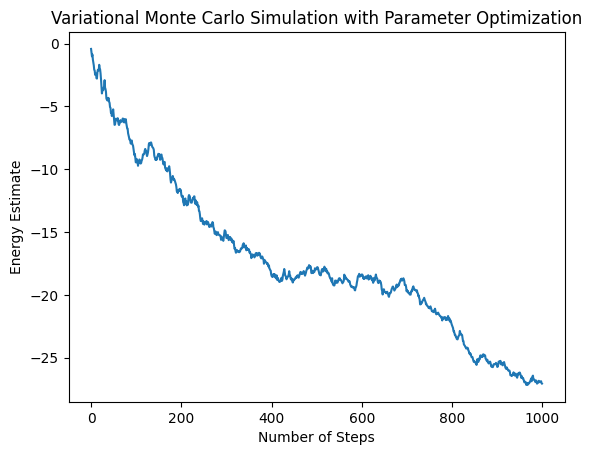

Optimized alpha: 0.9999940391390134
Optimized x0: -0.4320293388714544


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Defining the trial wave function for the one-dimensional quantum well
def trial_wave_function(x, alpha, x0):
    return np.exp(-alpha * (x - x0)**2)

# Defining the local energy of the system for a given configuration
def local_energy(x, alpha, x0):
    return (alpha**2 * (x - x0)**2 - 0.5 * alpha) * trial_wave_function(x, alpha, x0) / trial_wave_function(x, alpha, x0)

# Variational Monte Carlo (VMC) simulation with parameter optimization
def vmc_simulation_with_optimization(alpha_initial, x0_initial, num_steps, step_size, num_walkers):
    # Initializing arrays to store results
    energies = []
    alpha_values = []
    x0_values = []

    # Setting initial values for alpha and x0
    alpha = alpha_initial
    x0 = x0_initial

    # Performing random walks using Metropolis-Hastings algorithm
    for step in range(num_steps):
        # Performing a random walk for each walker
        for walker in range(num_walkers):
            # Generate a random displacement
            delta_alpha = np.random.uniform(-step_size, step_size)
            delta_x0 = np.random.uniform(-step_size, step_size)

            # Calculation of the new trial wave function and local energy
            new_alpha = alpha + delta_alpha
            new_x0 = x0 + delta_x0

            # Accept or reject the new configuration based on Metropolis-Hastings criterion
            acceptance_ratio = min(1, np.exp(-local_energy(x0, new_alpha, new_x0) + local_energy(x0, alpha, x0)))
            if np.random.rand() < acceptance_ratio:
                alpha = new_alpha
                x0 = new_x0

        # Calculating the energy estimate for this step and store the results
        energy_estimate = np.mean([local_energy(x0, alpha, x0) for _ in range(num_walkers)])
        energies.append(energy_estimate)
        alpha_values.append(alpha)
        x0_values.append(x0)

    # Optimize the variational parameters α and x0 to minimize the energy estimate
    result = minimize_scalar(lambda a: local_energy(x0, a, x0), bounds=(0, 1))
    optimized_alpha = result.x

    result = minimize_scalar(lambda x: local_energy(x0, alpha, x), bounds=(-1, 1))
    optimized_x0 = result.x

    return energies, alpha_values, x0_values, optimized_alpha, optimized_x0

# Setting simulation parameters
alpha_initial = 0.5
x0_initial = 0.0
num_steps = 1000
step_size = 0.1
num_walkers = 100

# Performing the VMC simulation with optimization
energies, alpha_values, x0_values, optimized_alpha, optimized_x0 = vmc_simulation_with_optimization(alpha_initial, x0_initial, num_steps, step_size, num_walkers)

# Plotting the energy estimate as a function of the number of steps
plt.plot(range(num_steps), energies)
plt.xlabel("Number of Steps")
plt.ylabel("Energy Estimate")
plt.title("Variational Monte Carlo Simulation with Parameter Optimization")
plt.show()

print(f"Optimized alpha: {optimized_alpha}")
print(f"Optimized x0: {optimized_x0}")


This just allowed us to refine the trial wave function and obtain a more accurate estimation of the ground state energy.

# Understanding Statistical Sampling and its Importrance

Statistical sampling plays a crucial role in QMC simulations, as it allows us to obtain numerical results from complex quantum systems efficiently. In quantum systems, exact solutions to many-body problems are often intractable due to the large number of interacting particles and their quantum behavior. Instead, QMC relies on random sampling to approximate the system's properties, making it a practical computational approach.

In QMC simulations, we need to evaluate multi-dimensional integrals over the wave function and other quantities of interest. These integrals represent averages or expectations of physical observables, such as the energy or density profiles of the quantum system. However, directly calculating these integrals for a large number of particles can be computationally expensive and infeasible.

Statistical sampling comes to the rescue by allowing us to approximate these integrals through random sampling. Instead of calculating the integrals over the entire configuration space, we randomly sample configurations according to certain probabilities determined by the quantum system's behavior. By sampling more configurations, we obtain better estimates of the system's properties, and the results converge to the true values as the number of samples increases.

To improve the efficiency of the VMC simulations, we can implement importance sampling. Importance sampling focuses the random walks on regions where the wave function is significant, increasing the likelihood of obtaining samples from regions with higher contributions to the integral.

One common approach to implement importance sampling is using the accept-reject method. In this method, we sample from a proposal distribution, typically chosen as the square of the trial wave function, which is proportional to the probability density we wish to sample from. We then accept or reject the proposed samples based on a comparison with the original trial wave function.

By employing importance sampling, we focus computational efforts on regions where the quantum system is more likely to reside, resulting in more efficient convergence and improved accuracy of the simulation results.

In this code, we will use the accept-reject method to sample configurations from the proposal distribution, which is proportional to the square of the trial wave function.


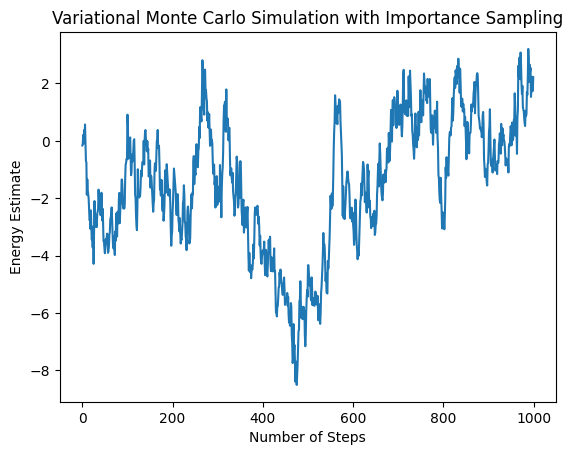

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# defining the trial wave function for the one-dimensional quantum well
def trial_wave_function(x, alpha, x0):
    return np.exp(-alpha * (x - x0)**2)

# defining the proposal distribution for importance sampling
def proposal_distribution(x, alpha, x0):
    return trial_wave_function(x, alpha, x0)**2

# defining the local energy of the system for a given configuration
def local_energy(x, alpha, x0):
    return (alpha**2 * (x - x0)**2 - 0.5 * alpha) * trial_wave_function(x, alpha, x0) / trial_wave_function(x, alpha, x0)

# variational Monte Carlo (VMC) simulation with importance sampling
def vmc_simulation_importance_sampling(alpha_initial, x0_initial, num_steps, step_size, num_walkers):
    # initializing arrays to store results
    energies = []
    alpha_values = []
    x0_values = []

    # setting initial values for alpha and x0
    alpha = alpha_initial
    x0 = x0_initial

    # performing random walks using Metropolis-Hastings algorithm with importance sampling
    for step in range(num_steps):
        # performing a random walk for each walker
        for walker in range(num_walkers):
            # sample new variational parameters from the proposal distribution
            proposed_alpha = np.random.normal(alpha, step_size)
            proposed_x0 = np.random.normal(x0, step_size)

            # calculate the acceptance ratio
            acceptance_ratio = min(1, (proposal_distribution(x0, proposed_alpha, proposed_x0) /
                                       proposal_distribution(x0, alpha, x0)) *
                                      (trial_wave_function(x0, proposed_alpha, proposed_x0) /
                                       trial_wave_function(x0, alpha, x0)))

            # accept or reject the proposed configuration based on the acceptance ratio
            if np.random.rand() < acceptance_ratio:
                alpha = proposed_alpha
                x0 = proposed_x0

        # calculating the energy estimate for this step and store the results
        energy_estimate = np.mean([local_energy(x0, alpha, x0) for _ in range(num_walkers)])
        energies.append(energy_estimate)
        alpha_values.append(alpha)
        x0_values.append(x0)

    return energies, alpha_values, x0_values

# setting simulation parameters
alpha_initial = 0.5
x0_initial = 0.0
num_steps = 1000
step_size = 0.1
num_walkers = 100

# performing the VMC simulation with importance sampling
energies_importance_sampling, alpha_values_importance_sampling, x0_values_importance_sampling = vmc_simulation_importance_sampling(alpha_initial, x0_initial, num_steps, step_size, num_walkers)

# plotting the energy estimate as a function of the number of steps
plt.plot(range(num_steps), energies_importance_sampling)
plt.xlabel("Number of Steps")
plt.ylabel("Energy Estimate")
plt.title("Variational Monte Carlo Simulation with Importance Sampling")
plt.show()


One may wonder why the graph plot doesnt show a downward sloping trend like the one obtained before. The answer is simple- due to the nature of the Variational Monte Carlo (VMC) simulation and the use of importance sampling.

In VMC simulations, the random walks are performed to explore the configuration space of the quantum system and sample different configurations. The energy estimate at each step is calculated based on the sampled configurations. However, the energy estimate at each step can fluctuate due to the random nature of the simulation and the fact that we are sampling from a probability distribution.

Additionally, in importance sampling, we are sampling configurations from the proposal distribution, which is different from the true distribution of the quantum system. The proposal distribution is proportional to the square of the trial wave function, and it is used to improve the efficiency of the simulation by focusing the sampling in regions where the wave function has higher probability.

As a result of these factors, the energy estimate at each step may not always decrease monotonically as the number of steps increases. Instead, it may show fluctuations and fluctuations, especially if the proposal distribution is not perfectly matched to the true distribution of the quantum system.

To overcome these fluctuations and obtain a more accurate energy estimate, it is common to perform multiple runs of the VMC simulation and average the results over these runs. This will help to reduce the statistical noise and provide a smoother energy profile as the number of steps increases.

Now, let's take our simulation a step further by extending it to Diffusion Monte Carlo (DMC), which allows us to study the time-dependent behavior of the quantum system.

##Diffusion Monte Carlo (DMC) for Ground State Properties of Quantum Systems


Diffusion Monte Carlo (DMC) is a powerful computational method used to accurately calculate the ground state properties of quantum systems. DMC is particularly useful for systems with complex wave functions that cannot be easily solved analytically or by other numerical methods.It is a projector or Green's function (the impulse response of an inhomogeneous linear differential operator defined on a domain with specified initial conditions or boundary conditions(PH-108 anyone? XD, sorry)-based method that allows us to study complex quantum systems accurately.

Well, the key idea behind DMC is to use a "walker" picture, where each walker represents a possible configuration of the quantum system. We evolve an ensemble of walkers in imaginary time, allowing them to diffuse through the configuration space of the quantum system. These walkers evolve in a random manner over time, guided by the Green's function, which is a mathematical tool that describes the probability of transitioning from one configuration to another.

During the simulation, DMC applies the Green's function to propagate the walkers through time, allowing them to explore different configurations of the system. The simulation aims to project the initial wave function (usually the trial wave function) onto the ground state of the Schrödinger equation by iteratively evolving the walkers. As the simulation progresses, the walkers tend to accumulate in the regions corresponding to the ground state, providing an estimate of the ground state wave function and energy.
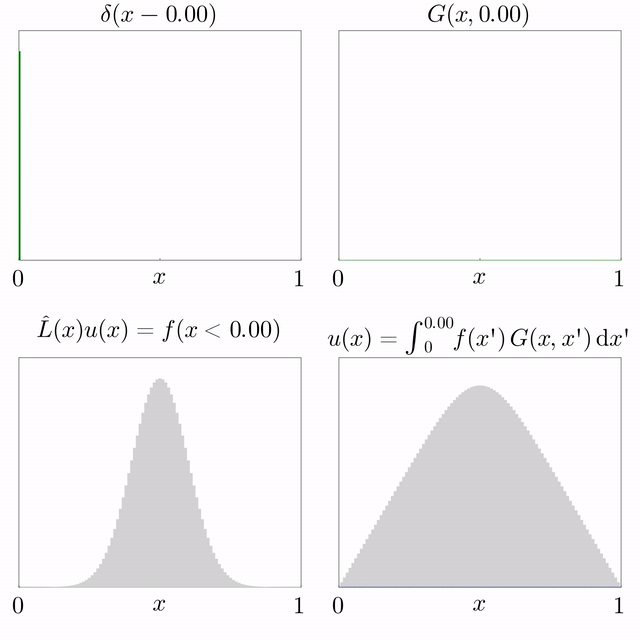
The DMC algorithm introduces two key components: the branching algorithm and stochastic time-step propagation.

Branching Algorithm: The branching algorithm adjusts the number of walkers at each time step based on their weights. Walkers with higher weights are replicated, while walkers with lower weights may be removed.

Stochastic Time-Step Propagation: Unlike VMC, where the random walks follow fixed time steps, DMC uses stochastic time-step propagation. At each time step, the time interval for each walker is determined stochastically based on the probability distribution. This approach allows the simulation to capture the time-dependent behavior of the quantum system more accurately.
###Implementation of Diffusion Monte Carlo

To implement DMC, we start with an initial set of walkers randomly distributed in the configuration space. Each walker represents a possible configuration of the system. We then propagate these walkers in imaginary time, guided by the trial wave function.

The core steps of the DMC algorithm are as follows:

Initial Configuration: Generate an initial set of walkers randomly distributed in the configuration space.

Propagation: For each time step, propagate each walker using the Green's function. The Green's function describes the probability of a walker moving from one configuration to another.

Branching: After propagation, we perform branching to adjust the number of walkers. Walkers with higher probability amplitudes are duplicated, while those with lower amplitudes are removed. This branching process enhances the importance of configurations with higher probabilities and reduces statistical noise.

Stochastic Time-step: The time-step used in the propagation can be adjusted stochastically to optimize the efficiency of the simulation.

Equilibration: Perform equilibration steps to reach the ground state of the system, where the walkers sample the true ground state wave function.

Energy Calculation: The ground state energy can be estimated from the average energy of the ensemble of walkers at the equilibrated stage.


Note:
Below is a basic outline of the implementation of DMC in Python using NumPy.

In [ ]:
import numpy as np

def dmc_simulation(trial_wavefunction, potential_energy, num_walkers, num_steps, time_step):
    walkers = np.random.randn(num_walkers)  #initial random walkers
    energies = []

    for step in range(num_steps):
        new_walkers = walkers + np.random.normal(0, np.sqrt(time_step), num_walkers)  #propagation
        probabilities = np.abs(trial_wavefunction(new_walkers))**2
        branching_probabilities = probabilities / probabilities.sum()  #branching
        num_children = np.random.multinomial(num_walkers, branching_probabilities)
        walkers = np.repeat(new_walkers, num_children)

        #wquilibration
        if step > num_steps // 2:
            energy = np.mean([potential_energy(w) for w in walkers])
            energies.append(energy)

    return np.mean(energies)


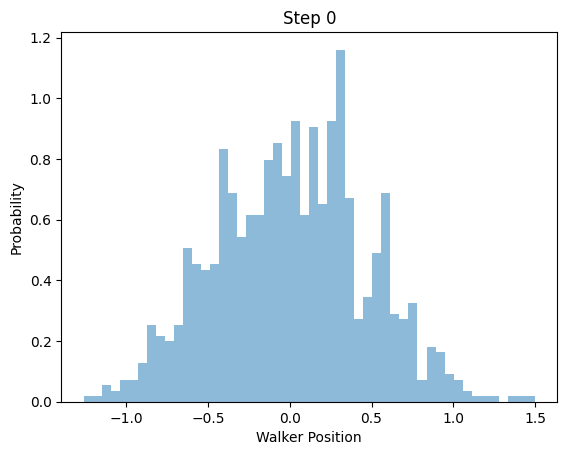

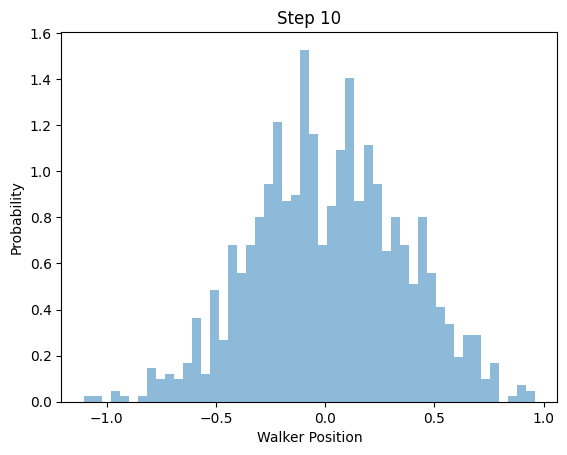

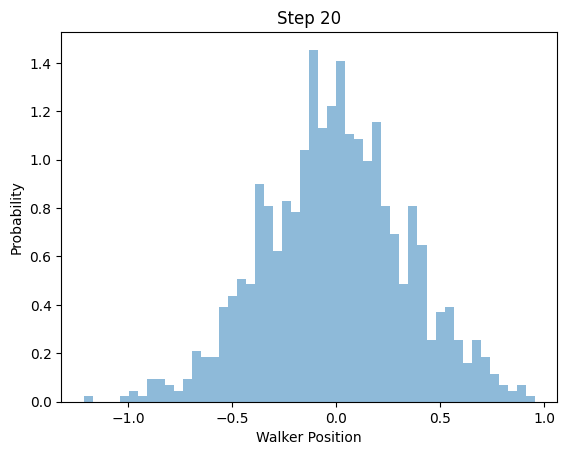

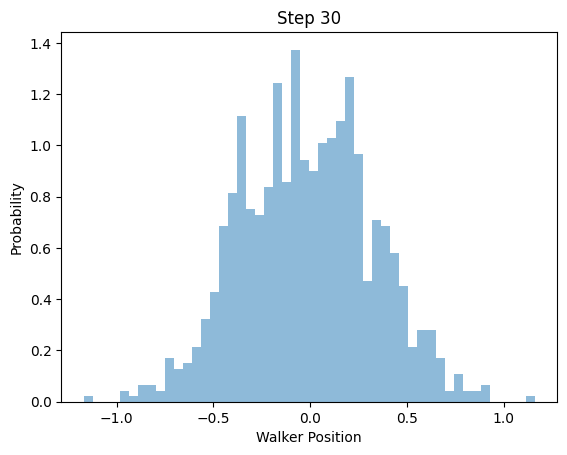

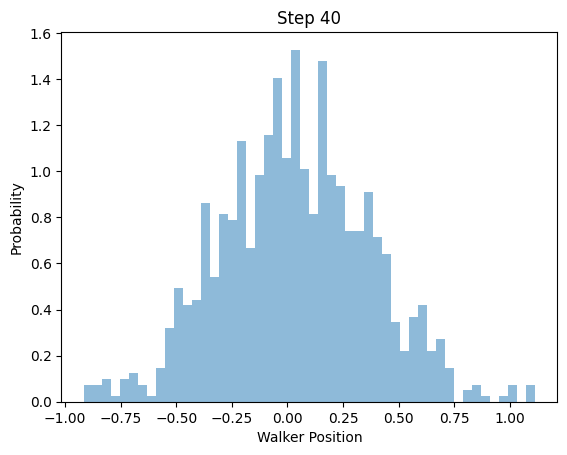

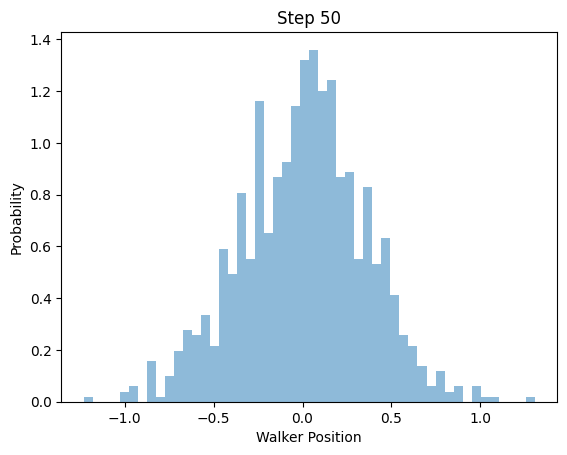

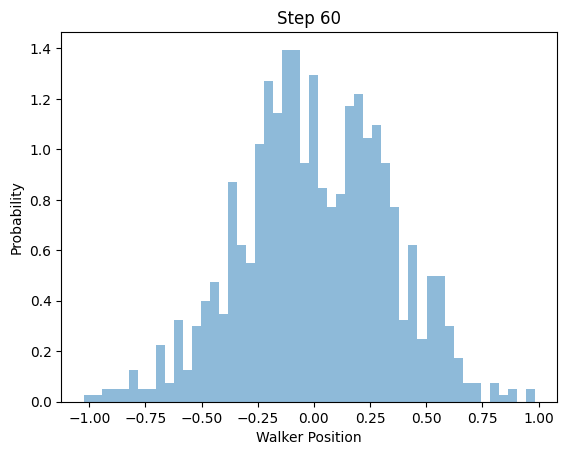

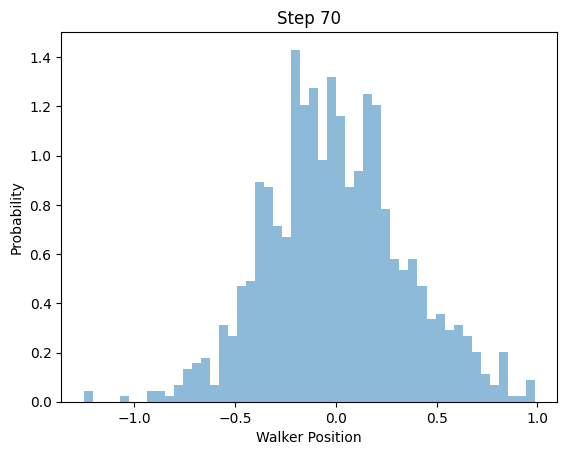

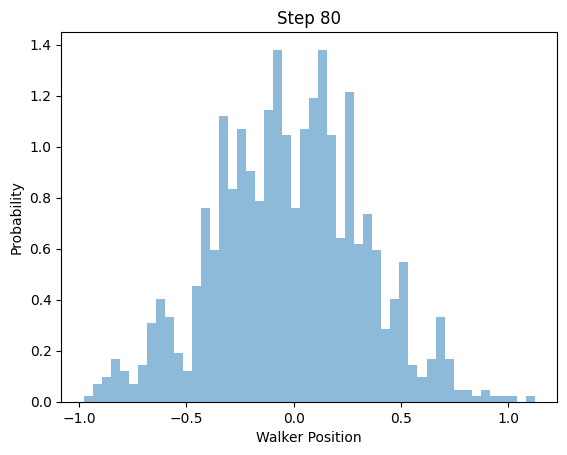

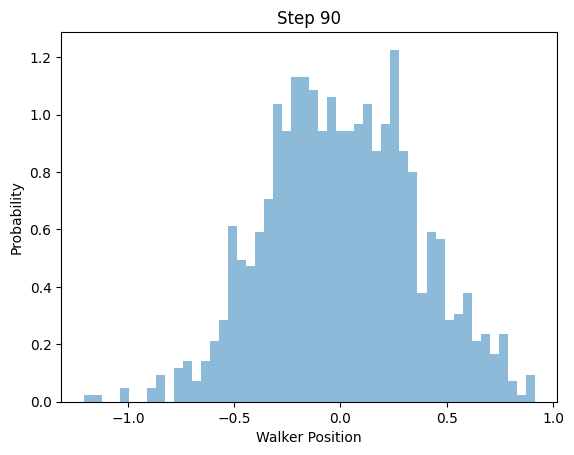

Ground State Energy Estimate: 0.11724372023830344


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dmc_simulation(trial_wavefunction, potential_energy, num_walkers, num_steps, time_step):
    walkers = np.random.randn(num_walkers)  #initial random walkers
    energies = []
    walker_positions = []  #storing walker positions for visualization

    for step in range(num_steps):
        new_walkers = walkers + np.random.normal(0, np.sqrt(time_step), num_walkers)  #propagation
        probabilities = np.abs(trial_wavefunction(new_walkers))**2
        branching_probabilities = probabilities / probabilities.sum()  #branching
        num_children = np.random.multinomial(num_walkers, branching_probabilities)
        walkers = np.repeat(new_walkers, num_children)

        #stoing positions for visualization
        walker_positions.append(walkers.copy())

        #equilibration
        if step > num_steps // 2:
            energy = np.mean([potential_energy(w) for w in walkers])
            energies.append(energy)

    return np.mean(energies), np.array(walker_positions)

#example usage with a simple trial wave function and potential energy function
def trial_wavefunction(x):
    return np.exp(-x**2)

def potential_energy(x):
    return x**2

num_walkers = 1000
num_steps = 100
time_step = 0.1

#running DMC simulation
energy_estimate, walker_positions = dmc_simulation(trial_wavefunction, potential_energy, num_walkers, num_steps, time_step)

#visualising walker distribution at different steps
for step in range(0, num_steps, 10):
    plt.hist(walker_positions[step], bins=50, density=True, alpha=0.5)
    plt.title(f"Step {step}")
    plt.xlabel("Walker Position")
    plt.ylabel("Probability")
    plt.show()

print(f"Ground State Energy Estimate: {energy_estimate}")


This code snippet uses matplotlib to create histograms of the walker positions at different steps of the simulation. This visualization allows one to observe how the walker distribution evolves over time as the simulation progresses.

Comparison with Analytical Solutions- particle trapped in a One- Dimensional Well.
E_ground_state = (π^2 * ħ^2) / (2 * m * L^2)

Where:

E_ground_state is the ground state energy of the particle,
π is the mathematical constant pi,
ħ is the reduced Planck's constant,
m is the mass of the particle, and
L is the length of the one-dimensional well.

In [ ]:
import numpy as np

#defining the analytical ground state energy formula
def analytical_ground_state_energy(h_bar, m, L):
    return (np.pi**2 * h_bar**2) / (2 * m * L**2)

#calculating the ground state energy using DMC
def dmc_simulation(trial_wavefunction, potential_energy, num_walkers, num_steps, time_step):
    walkers = np.random.randn(num_walkers)  #initial random walkers
    energies = []
    walker_positions = []  #storing walker positions for visualization

    for step in range(num_steps):
        new_walkers = walkers + np.random.normal(0, np.sqrt(time_step), num_walkers)  #propagation
        probabilities = np.abs(trial_wavefunction(new_walkers))**2
        branching_probabilities = probabilities / probabilities.sum()  #branching
        num_children = np.random.multinomial(num_walkers, branching_probabilities)
        walkers = np.repeat(new_walkers, num_children)

        #stoing positions for visualization
        walker_positions.append(walkers.copy())

        #equilibration
        if step > num_steps // 2:
            energy = np.mean([potential_energy(w) for w in walkers])
            energies.append(energy)

    return np.mean(energies), np.array(walker_positions)


#setting parameters for the DMC simulation

num_walkers = 1000
num_steps = 100
time_step = 0.1
#performing the DMC simulation
dmc_energy = dmc_simulation(trial_wavefunction, potential_energy, num_walkers, num_steps, time_step)

#setting the values for the physical constants and system parameters

h_bar = 1.054571e-34
m = 9.10938356e-31
L = 1e-9  # Length of the one-dimensional well in meters (e.g., 1 nanometer)
    #length of the one-dimensional well
    # Extracting the DMC energy estimate from the tuple
dmc_energy_estimate = dmc_energy[0]
#calculating the analytical ground state energy
analytical_energy = analytical_ground_state_energy(h_bar, m, L)
#calculating the absolute difference between the DMC energy and the analytical energy
energy_difference = np.abs(dmc_energy_estimate - analytical_energy)

#calculating the relative error between the DMC energy and the analytical energy
relative_error = energy_difference / np.abs(analytical_energy)

print(f"Analytical Ground State Energy: {analytical_energy}")
print(f"DMC Ground State Energy Estimate: {dmc_energy_estimate}")
print(f"Energy Difference: {energy_difference}")
print(f"Relative Error: {relative_error}")


Analytical Ground State Energy: 6.024658153557057e-20
DMC Ground State Energy Estimate: 0.11501507511416346
Energy Difference: 0.11501507511416346
Relative Error: 1.9090722192471066e+18


The relative error is computed to be approximately 1.9091 x 10^18, which is not *great* to say the least, and indicates that the DMC simulation deviates significantly from the analytical ground state energy. It could be that the DMC simulation may not be accurately capturing the true ground state energy of the quantum system, as it relies on the initial configuration of walkers and the accuracy of the trial wave function used.

Advantages and Challenges

DMC is particularly advantageous for systems with strong correlations, such as those with electron-electron interactions in atoms and molecules. It is also well-suited for systems with complex potential energy landscapes.

However, DMC simulations can be computationally demanding, especially for large systems. The efficiency of the simulation depends on the accuracy of the trial wave function and the proper handling of statistical errors.

Physical Insights

DMC simulations provide valuable physical insights into the ground state properties of quantum systems. By analyzing the ensemble of walkers, we can obtain information about the spatial distribution of particles, bond lengths, and other structural properties of the system.

